## TP 1

### Ejercicios 1 _k-means_ y 2 _k-mediods_

**Autor:** Baldezzari Lucas

_Nota_: En general intentaré escribir los comentarios y variables en el código en _inglés_. Esto para evitar problemas de incompatibilidad para declarar variables, y de paso me sirve para practicar un poco escribir en inglés.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

##### Defino algunas funciones previas que serán de ayuda

In [2]:
def plotScatter(values, centros, title = "Grafico Dispersión", labels = [],
                savePlots = False, folder = "figs"):
    """
    Args:
        - values: The dataset with form [NxM]
        - centros
    """
    
    plt.grid(True, 'major', linestyle='-', linewidth =.9, zorder = 1.0)

    plt.scatter(values[: , 0], values[: , 1], c = labels,
             zorder = 2.0, alpha=0.65, cmap='tab10', s = 50)
    
    if centros.any():
        plt.scatter(centros[: , 0], centros[: , 1],
                 zorder = 3.0, alpha=0.9, s = 50, marker = "*",
                 label = "Centroides", c="k")
    
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    # plt.legend(loc='best')

    if savePlots:
        pathACtual = os.getcwd()
        newPath = os.path.join(pathACtual, folder)
        os.chdir(newPath)
        plt.savefig(f'{title}.png', dpi = 600)
        os.chdir(pathACtual)
        
    plt.show()

### Aplicación de *k*-means

- El método distance() calcula la distancia entre cada punto de mi set de datos y los puntos pasados como parámetro en _centers_

NOTA: Se entrega la versión 2 de _distance()_ y _findingClusters()_ luego de las observaciones realizadas por Sebastián. Se intentó vectorizar al máximo.

In [3]:
def distance(X, centers):
    '''
    args:
        - X: Vector con datos para compararlo contra el dataset
        - dataset: set de datos de la forma [N x M]
    retorna:
        - La distancia de cada punto X respecto de cada centro en centers
        de la forma [1 x centers]
    '''
    
    numCenters = centers.shape[0]
    copias = np.tile(X, (numCenters,1)) #copio cada punto en "num_data" veces para luego compararlo con cada centro
    distance = np.sum((copias - centers)**2, axis = 1)**1/2
    
    return distance


def findingClusters(dataset, kClusters = 2, centers = None, iteraciones = 100):
    """
    Nota: Agrego el argumento "centers" con la idea de que se puedan definir centros
    manualmente.
    Note: The "centers" argument is added for manual intialization
    """
    labels = np.zeros(dataset.shape[0])
    
    costSum = -1
    oldCostSum = 0
    
    #step 1
    #if we have not the centers, we choose them randomly
    if not centers:
        rand = np.random.RandomState()
        index = rand.permutation(dataset.shape[0])[:kClusters] #select kClusters centers randomly
        centers = dataset[index]
        centers2 = dataset[index]
        
    while oldCostSum != costSum:
        
        oldCostSum = costSum
        costSum = 0

        # step 2.1: assign data to closest center
        distances = np.apply_along_axis(distance, 1, dataset, centers)
        labels = distances.argmin(axis = 1)

        # Step 2.2: Update the centers and cost function
        for ic in range(kClusters):
            cluster = dataset[labels == ic]

            cost2 = np.apply_along_axis(distance, 1, cluster, cluster).sum(axis=0)
            centers[ic] = cluster[cost2.argmin()] #select the minimun
            costSum += cost2.min()
        
        iteraciones -= 1
        if iteraciones == 0:
            break
       
    return centers, labels

Cargando datos

In [4]:
initialFolder = os.getcwd() #directorio donde estamos actualmente. Debe contener el directorio dataset
path = os.path.join(initialFolder,"data2cluster")
files = os.listdir(path) #leo los archivos dentro del path.
os.chdir(initialFolder) #vuelvo al directorio de inicio

#### Datos originales

Grafico los datos considerando su agrupación original

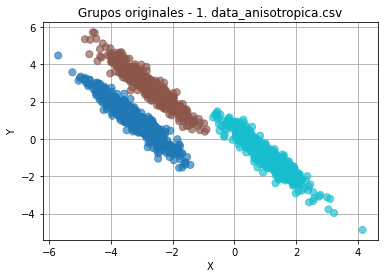

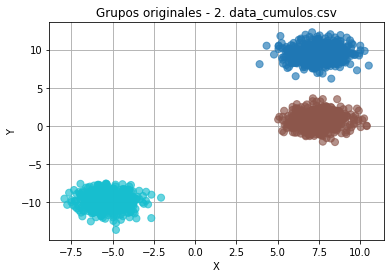

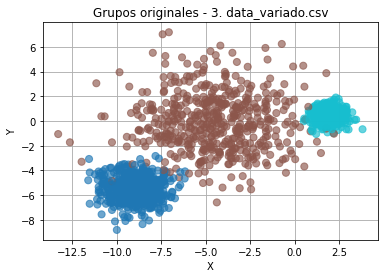

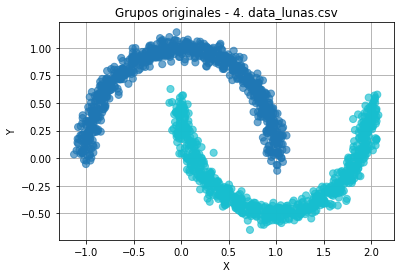

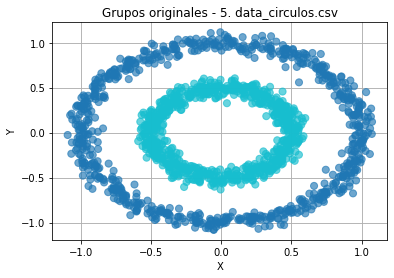

In [5]:
centers = np.array([])
#grafico los datos originales
for file in files:
    rawData = pd.read_csv(f"{path}/{file}") #cargo datos
    
    heads = rawData.keys() #nombre de columnas
    
    kGroups = rawData[heads[2]].nunique() #contabilizo la cantidad de grupos diferentes
    gruposOriginales = [f"Grupo {i}" for i in range(kGroups)]
    
    # mediaGrupos = rawData.groupby([heads[2]]).mean()
    
    values = np.asarray(rawData[[heads[0],heads[1]]])
    originalLabels = np.asarray(rawData[heads[2]])
    title = f"Grupos originales - {file}"
    
    plotScatter(values, centers, title = title, savePlots = True, folder = "figs",
                labels = originalLabels)

#### Implementación de findingClusters() para varios *k*

Se toman varios valores de *k* con la intención de evaluar cuanto tiempo le lleva al algoritmo encontrar los grupos apra cada set de datos.

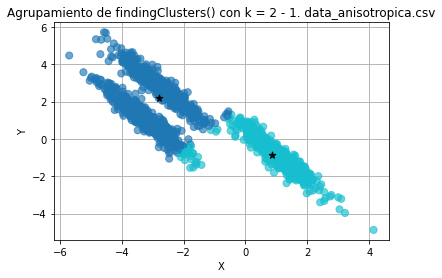

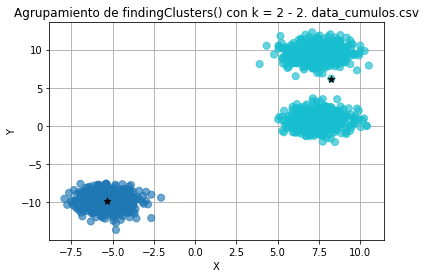

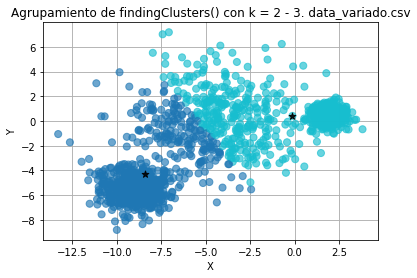

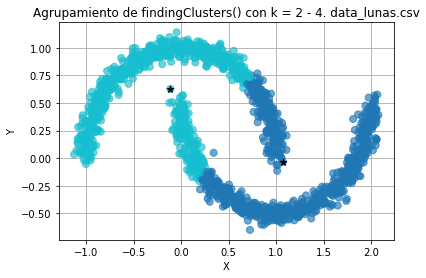

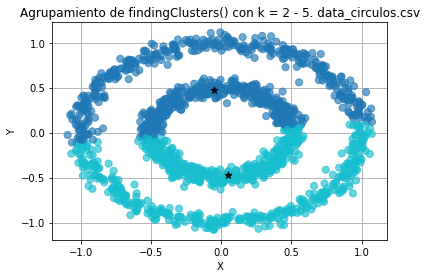

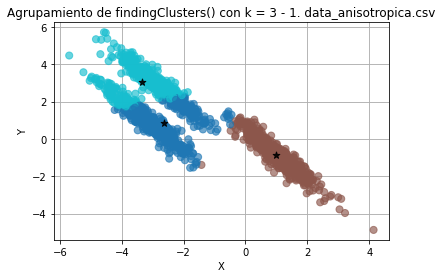

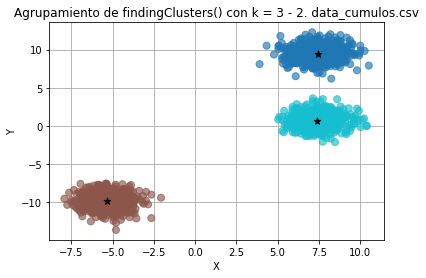

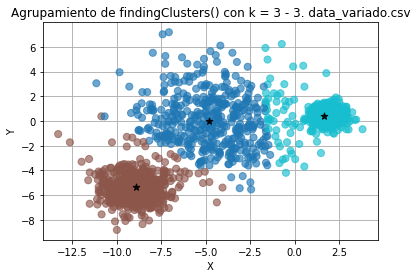

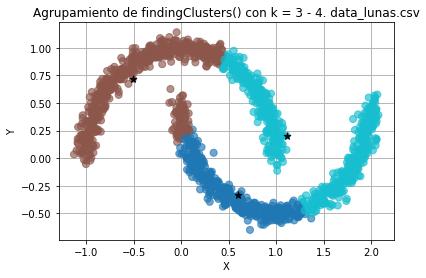

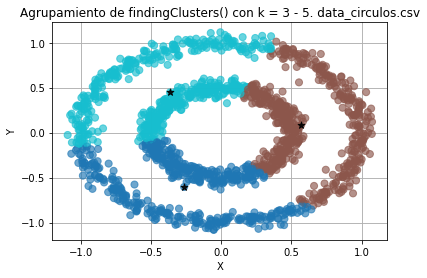

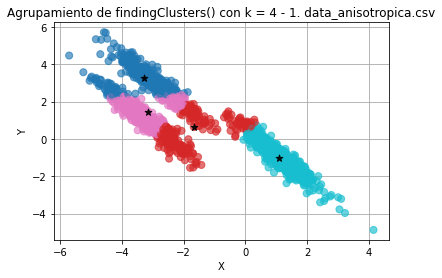

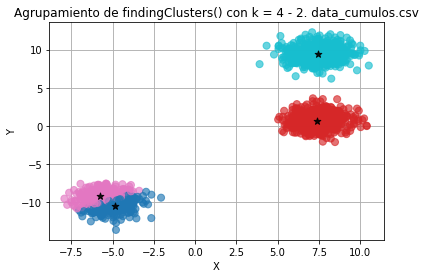

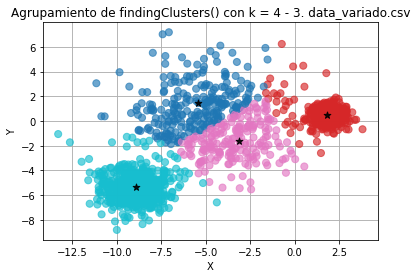

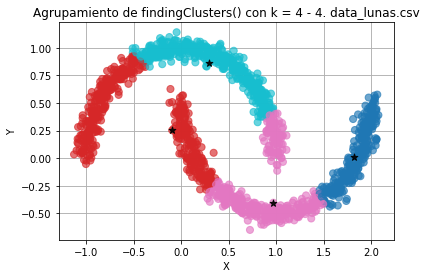

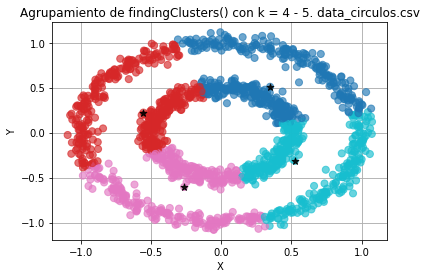

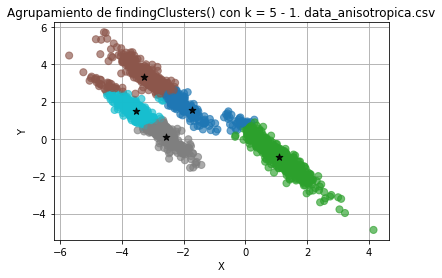

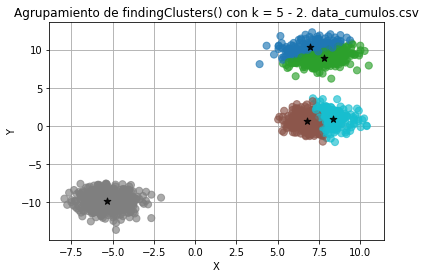

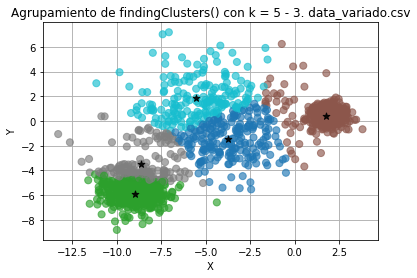

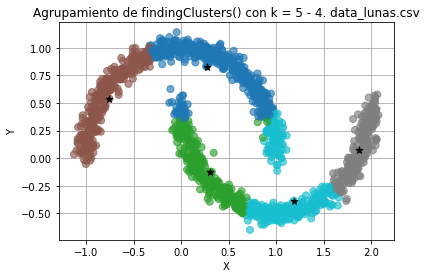

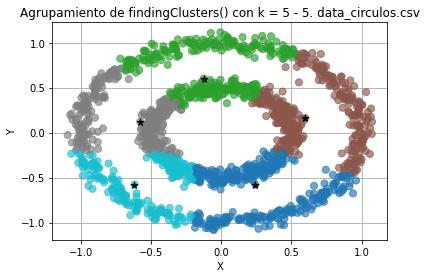

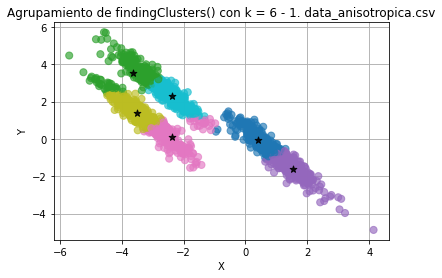

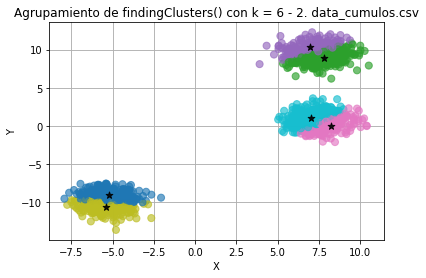

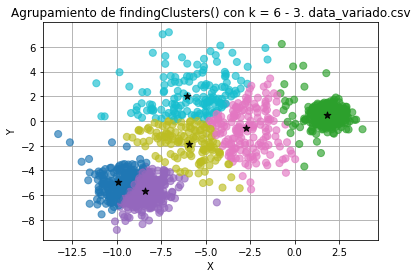

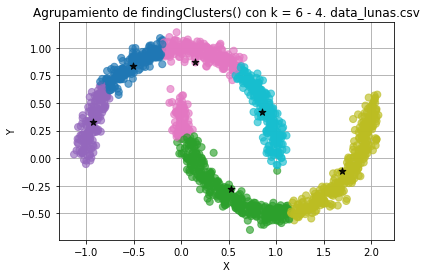

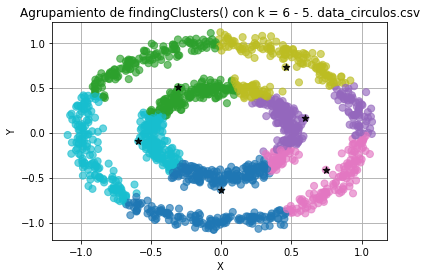

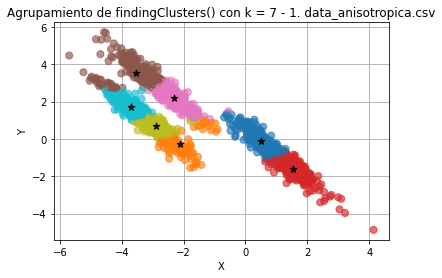

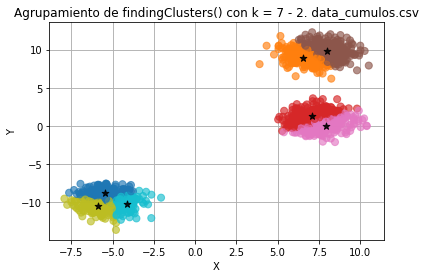

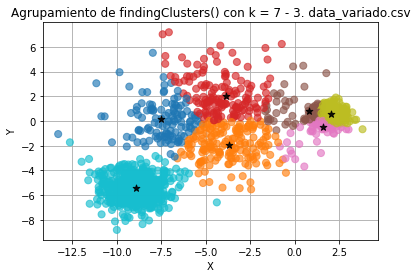

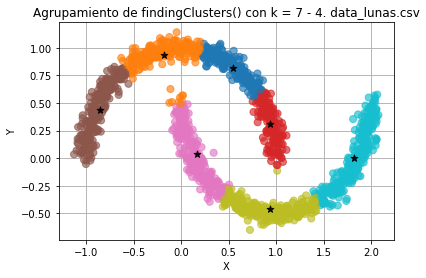

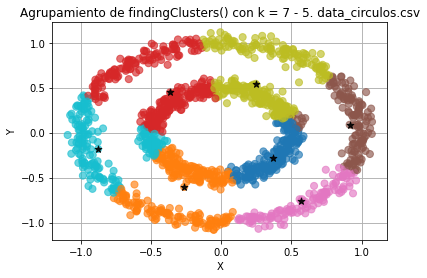

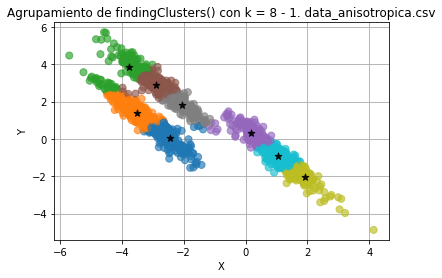

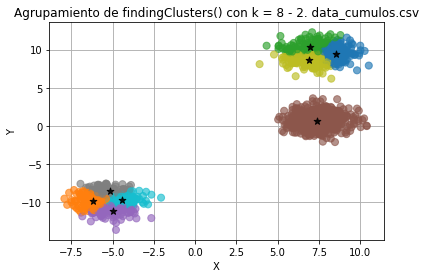

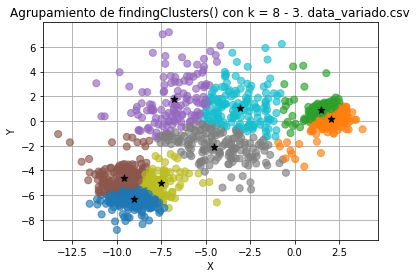

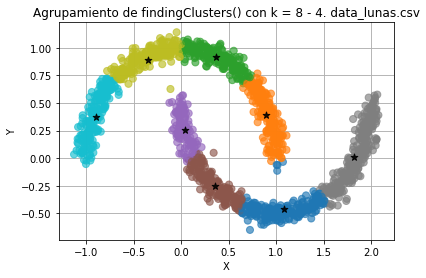

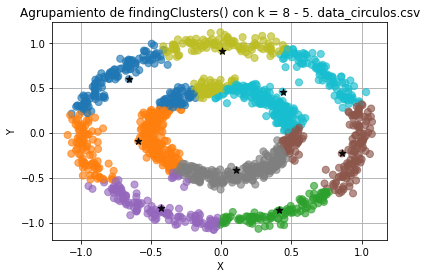

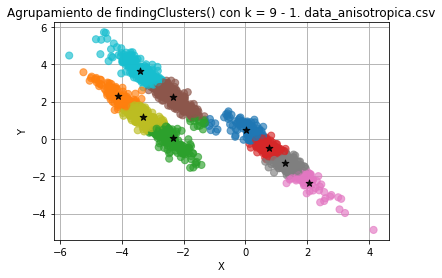

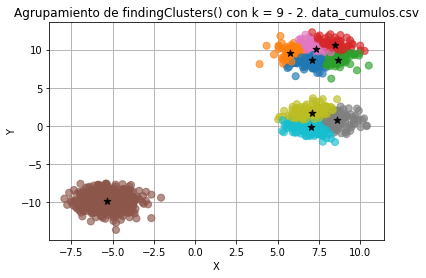

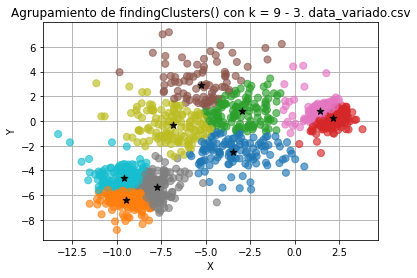

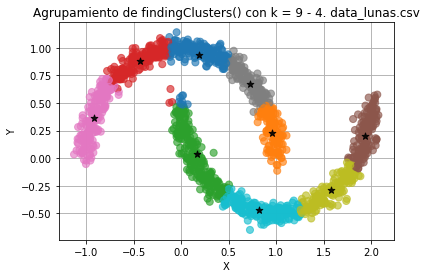

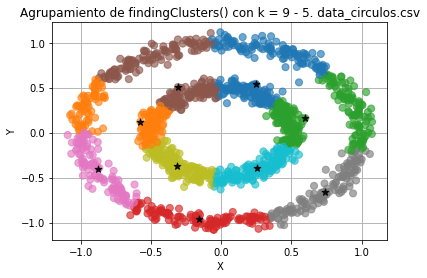

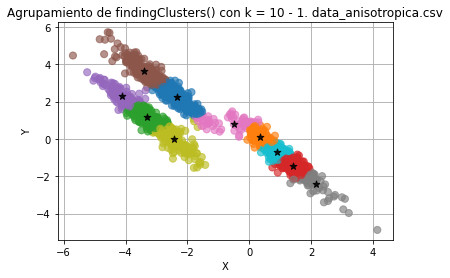

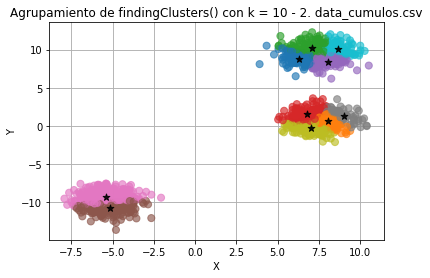

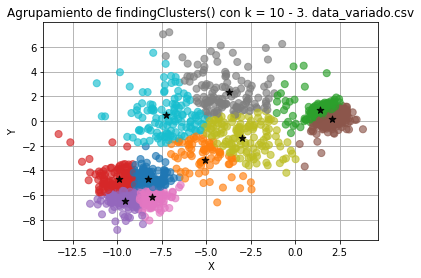

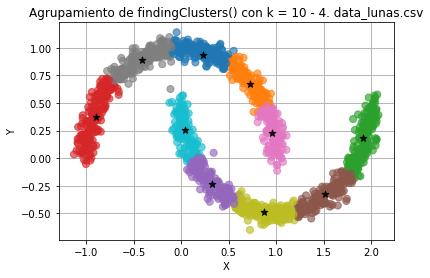

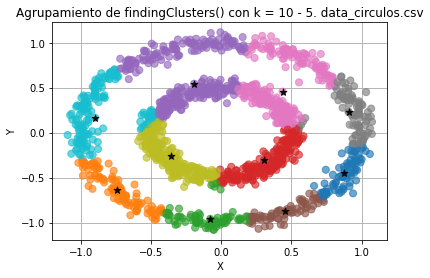

In [8]:
ks = [2,3,4,5,6,7,8,9,10]

tiemposKs = dict()

graficar = True

for k in ks:
    # tiemposKs[files[indexFile]] = dict()
    initialTime = time.time()
    tiempos = []
    for file in files:
        rawData = pd.read_csv(f"{path}/{file}") #cargo datos
        
        heads = rawData.keys() #nombre de columnas
        
        kGroups = rawData[heads[2]].nunique() #contabilizo la cantidad de grupos diferentes
        gruposOriginales = [f"Grupo {i}" for i in range(kGroups)]
        
        values = np.asarray(rawData[[heads[0],heads[1]]])
        originalLabels = np.asarray(rawData[heads[2]])
    
        centers, labels = findingClusters(dataset = values, kClusters = k, iteraciones = 10)
        
        if graficar == True:
            title = f"Agrupamiento de findingClusters() con k = {k} - {file}"

            plotScatter(values, centros = centers,
                        title = title, savePlots = False, folder = "figs",
                        labels = labels)
        
        stopTime = time.time()#/1000
        tiempoTranscurrido = stopTime - initialTime
        # print(f"Tiempo transcurrido de implementación para {file}: {tiempoTranscurrido}")
        
        tiempos.append(tiempoTranscurrido)
        
        initialTime = time.time()
        
    tiemposKs[f"{k}"] = tiempos

#### Tiempos totales transcurridos

Grafico los tiempos que le tomo al algorítmo poder encontrar los grupos para cada valor *k* propuesto

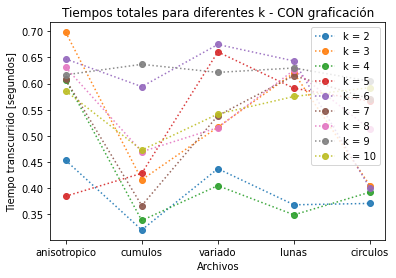

In [9]:
tiempos = np.zeros((len(ks),len(files))) 
# tiempos = []
i = 0
for key in tiemposKs.keys():
    tiempos[i] = tiemposKs[key]
    i += 1

title = "Tiempos totales para diferentes k - CON graficación"

etiquetas = ["anisotropico","cumulos","variado","lunas","circulos"]

for index in range(tiempos.shape[0]):
    plt.plot(etiquetas,tiempos[index,:], label = f"k = {ks[index]}",
             marker='o', linestyle=':', alpha = 0.9)
    plt.xlabel("Archivos")   # Inserta el título del eje X
    plt.ylabel("Tiempo transcurrido [segundos]")   # Inserta el título del eje Y
    plt.title(title)
    plt.legend(loc = "upper right")
    
savePlots = True
    
if savePlots:
    pathACtual = os.getcwd()
    newPath = os.path.join(pathACtual, "figs")
    os.chdir(newPath)
    plt.savefig(f'{title}.png', dpi = 400)
    os.chdir(pathACtual)
    
plt.show()

#### Tiempos para encontrar los clusters

NOTA: Sin la graficación, hay un ahorro de unos 0.2 a 0.3 segundos para encontrar los clusters.

Gracias por la observación.

### Discusión _k-means_ vs _k-mediods_

##### _k-means_

Los pasos para este algoritmo son,

1 Seleccionamos aleatoriamente la cantidad de centros  $\boldsymbol\mu_{1}, ..., \boldsymbol\mu_{k}$ según los _kClusters_.

2 Iteramos hasta no encontrar variaciones en nuestra función de costo.

2.1 Dados los centros $\boldsymbol\mu_{1}, ..., \boldsymbol\mu_{k}$ asigamos a cada punto $x_i$ al centro $\boldsymbol\mu_{k}$ más cercao, tal de disminuir la función,

$$\text {Cost}(\boldsymbol\mu_{1}, ..., \boldsymbol\mu_{k}) = \sum _{i=1}^{n} \min _{j=1,...,k} \left\|  x_{(i)} - \boldsymbol\mu_{k}\right\| ^2$$

2.2 Dados los clusters $C_1,...,C_ K$ debemos encontrar los nuevos centros $\boldsymbol\mu_{1}, ..., \boldsymbol\mu_{k}$ más representativos, haciendo,
$$\boldsymbol\mu_{k}=\operatorname {argmin}_{\boldsymbol\mu_{k}} \sum _{i \in C_ j} \| x_{(i)} - \boldsymbol\mu_{k} \| ^2 =\frac{\sum _{i \in C_ j} x_{(i)} }{|C_ j|}$$

donde $|C_ j|$ es el número de puntos en el cluster $C_ j$

Es **importante** señalar que los algoritmos de _k-means_ necsitan de un número _k_ de clusters previos, lo cual puede llevar a que una mala elección del número de grupos a buscar, logre un inadecuado funcionamiento. Esto puede verse claramente en las gráficas anteriores. Sin embargo, esto es uno de los *problemas* con el aprendizaje no supervisado, uno en principio *no sabe* cuantos grupos, labels, etc, podemos tener en nuestros datos, a menos claro, que tengamos una primera muestra con la cual realizar el entrenamiento y búsqueda de los centroides.

Además de lo mencionado, otra limitación del algoritmo de _k-means_ es el hecho de que la selección aleatoria de los centroides puede ser tal que alguno de ellos -o ninguno- sea miembro o pertenezca a los grupos que queremos encontrar.

Para solucionar este inconveniente puede utilizarse el approach de seleccionar aleatoriamente _k_ miembros pero ahora **pertenecientes a nuestro set de datos** (o podría ser manual si tuvieramos un set previo) de tal manera que ahora nuestros centros ya son parte de nuestros datos y no de todo el plano real.

Es decir que seleccionamos los centros aleatoriamente haciendo, $\big \{  \boldsymbol\mu_{1}, ..., \boldsymbol\mu_{k} \big \}  \subseteq \big \{  x_1, ..., x_ n \big \}$

Esto es lo que se hace dentro del método _findingClusters()_ en las lineas,

```python
    #step 1
    #if we have not the centers, we choose them randomly
    if not centers:
        rand = np.random.RandomState()
        index = rand.permutation(values.shape[0])[:kClusters] #select kClusters centers randomly
        centers = values[index]
```

Este simple cambio tiene un efecto contundente a la hora de encontrar los posibles grupos dentro de nuestros datos, ya que ahora, a pesar de una selección aleatoria, estamos teniendo centros que son parte de nuestros datos.

Este es el primer cambio importante de _k-mediods_ respecto de _k-means_.


**Tiempo de ejecución**

Al graficar el tiempo que le lleva al algoritmo separar cada grupo según el tamaño de _k_ no se percibe que haya un aumento considerable. De hecho, a modo de ejemplo, en el caso de agrupar los datos de _data_cumulos.csv_ para _k = 10_ se ve que el tiempo insumido es menor que para _k = 7_. Por supuesto que esto no nos sirve para sacar conclusiones contundentes. Es de esperar que para _k_ más grandes, el tiempo sea mayor, ya que se deben calcular mayor cantidad de distancias entre mis datos y los centros. Pero el hecho de seleccionar centros al azar también juega un papel fundamental, ya que habrá "corridas" en donde los centros estén "mejor" iniciados haciendo que la cantidad de iteraciones sea menor, lo que se traduciría en menores tiempos. Desde un punto de vista estadístico se podría ejecutar el anterior varias veces (por encima de 30) y comparar o promediar los tiempos necesarios para agrupar cada archivo para cada _k_

**¿Es suficientemente veloz para distintos valores de k?**

Para la cantidad de datos que estamos evaluando, se podría decir que es _"veloz"_, no obstante, la implementación de _k-means_ posee algunas cuestiones extras a las que ya hemos mencionado que podrían hacer que el algoritmo le tome mucho tiempo en converger -incluso podría no hacerlo-, sobre todo en lo referente a la inicialización de los centros y la posible cantidad de grupos que quisieramos encontrar. Sin embargo, a pesar de esto, es conocido que los algoritmos de clustering mediante _k-means_ son robustos y ágiles en su ejecución.

Ahora bien, sabemos que en el caso de trabajar con _k-means_ queremos minimizar la función de costo dada por,
$$\sum_{i=1}^{k} \sum_{\mathbf x_j \in S_i} \left\| \mathbf x_j - 
\boldsymbol\mu_k \right\|^2$$

Para esto derivaremos la función con respecto a $\boldsymbol\mu_{k}$ e igualaremos a cero, obteniendo que nuestro nuevo centro estará dado por,

$$\frac{1}{\vert S_{i}^{t} \vert} \displaystyle\sum_{\mathbf{x}_{j} \in S_{i}^{t}} \mathbf{x}_{j}$$

Tengo entendido que esta minimización funciona cuando estamos trabajando con distancias euclideas, sin embargo, en algunos casos, los datos pueden estar distribuidos de tal manera que la función de costo mediante la distancia euclidea no sea la adecuada, por lo tanto, el algoritmo podría no converger ya que podríamos no encontrar una condición que satisfaga que los datos de nuestro dataset conformen un centro de tal manera de _"parar de iterar"_ debido a que siempre tendremos cambios en nuestra función de costo.

Para intentar resolver lo anterior, es que se modifica levemente el algortimo, de tal manera que ahora nuestra función de costo ya no es la distancia euclidea sino algún otro método. Luego, en cada iteración, actualziamos la función de costo midiendo la distancia de cada punto $x_i$ de nuestro dataset a los centros asignamos a todos nuestros datos a los centros $\boldsymbol\mu_k$ más cercanos, y luego actualizamos los centros buscando aquellos puntos en donde la suma de la distancia de cada punto $x_i$ al centro $\boldsymbol\mu_k$ sea mínimo.

Considerando todo esto, podemos decir que el algoritmo de **_k-mediods_** es,

1 Seleccionamos aleatoriamente la cantidad de centros  $\boldsymbol\mu_{1}, ..., \boldsymbol\mu_{k}$ según los _kClusters_ que queremos encontrar, pero ahora considerando seleccionar puntos de nuestro data set, esto es, $\big \{  \boldsymbol\mu_{1}, ..., \boldsymbol\mu_{k} \big \}  \subseteq \big \{  x_1, ..., x_ n \big \}$

2 Iteramos hasta no encontrar variaciones en nuestra función de costo.

2.1 Dados los centros $\boldsymbol\mu_{1}, ..., \boldsymbol\mu_{k}$ asigamos a cada punto $x_i$ al centro $\boldsymbol\mu_{k}$ más cercao, tal de disminuir la función,
$$\text {Cost}(z_1, ... z_ K) = \sum _{i=1}^{n} \min _{j=1,...,k} \text {dist}(x^{(i)}, z_ j)$$

2.2 Dados los costos $C_1,...,C_ K$ debemos encontrar los nuevos centros $\boldsymbol\mu_{1}, ..., \boldsymbol\mu_{k}$ más representativos, haciendo mínima la expresión,

$$\sum _{x^{(i)} \in C_ j} \text {dist}(x^{(i)}, z_ j)$$

Entiendo que el algoritmo de _k-mediods_ es computacionalmente más costoso debido a que en el paso 2.2 a diferencia del 2.2 de _k-means_, estamos midiendo la distancia entre cada par de puntos de nuestro set de datos y los centros, mientras que en _k-means_ es solamente una suma para cada punto del set de datos.

**Funcionamiento general**

Según lo visto en cada gráfica presentada, el algoritmo sólo pudo separar correctamente los grupos en el caso del archivo _data_cumulos.csv_ con _k = 3_. En los otros casos, comparado con los datos originales, el algorítmo implementado no logró separar correctamente.

